### Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Install requirements

In [2]:
!pip install pyod

### Import requirements

In [18]:
from pyod.models.copod import COPOD
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Load data

In [4]:
datapath = r'/content/drive/MyDrive/dogecoin/doge_usdt_4_1_5_18.csv'
dataset = pd.read_csv(datapath, header=None)

In [5]:
dataset.head()

,0,1,2,3,4,5,6,7
0,1617206400,0.053793,0.053549,0.053562,0.053789,223,6.125667e+05,32912.12767
1,1617206460,0.053830,0.053593,0.053792,0.053618,484,2.651230e+06,142430.65080
2,1617206520,0.053615,0.053520,0.053615,0.053560,399,1.408978e+06,75469.32434
3,1617206580,0.053637,0.053500,0.053536,0.053637,243,1.000480e+06,53576.25380
4,1617206640,0.053686,0.053567,0.053603,0.053646,241,1.534275e+06,82283.92655


### Features and labels

In [6]:
id_c = 0
high_c = 1
low_c = 2
open_c = 3
close_c = 4
count_c = 5
amount_c = 6
volume_c = 7

increase = 1
decrease = 0

time_series = 1

In [7]:
feature_dataset = dataset.drop(id_c, axis=1)

In [8]:
feature_dataset.head()

,1,2,3,4,5,6,7
0,0.053793,0.053549,0.053562,0.053789,223,6.125667e+05,32912.12767
1,0.053830,0.053593,0.053792,0.053618,484,2.651230e+06,142430.65080
2,0.053615,0.053520,0.053615,0.053560,399,1.408978e+06,75469.32434
3,0.053637,0.053500,0.053536,0.053637,243,1.000480e+06,53576.25380
4,0.053686,0.053567,0.053603,0.053646,241,1.534275e+06,82283.92655


In [9]:
# features = np.array(feature_dataset)
train_x = np.array(feature_dataset)

In [10]:
# print(features.shape)
print(train_x.shape)

(68487, 7)


### Train dataset and test dataset

In [11]:
# test_full_ratio = 0.2
# random_seed = 15

In [12]:
# train_x, test_x = train_test_split(features, test_size=test_full_ratio, random_state=random_seed)

In [13]:
# print(train_x.shape)
# print(test_x.shape)

### COPOD

In [14]:
clf = COPOD()
clf.fit(train_x)

COPOD(contamination=0.1, n_jobs=1)

In [15]:
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_
# y_test_scores = clf.decision_function(test_x)

In [16]:
print(y_train_pred)
print(y_train_scores)
# print(y_test_scores)

[0 0 0 ... 0 0 0]
[12.9132351  12.66186255 12.67921802 ... 10.54199476  8.47936396
  8.48356986]


### Result

In [17]:
anomaly = []
for i in range(len(y_train_pred)):
  if y_train_pred[i] == 1:
    anomaly.append(i)

print(len(anomaly))
print(anomaly)

6849
[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 126, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 192, 194, 196, 197, 201, 202, 203, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 225, 226, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 279, 280, 284, 285, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 3

### Plot

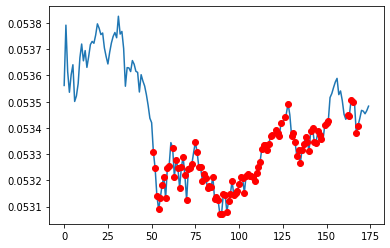

In [36]:
plt.plot(feature_dataset[3][0:175])
for i in range(100):
  plt.plot(anomaly[i], feature_dataset[3][anomaly[i]], color='r', marker='o', linewidth=1)